# Businees Problem

- Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.


- In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let'
s embark on
the journey of sales prediction using machine learning in Python.

## Solution :-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Accredian\advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.shape

(200, 4)

In [11]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [16]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


- There is no duplicate records in a dataset

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Post Model Assumptions (Regression model)

- 1. Target variable Should be Numerical.
- 2. There is no multicolinearity in independent variables (No Multicolinearity)

## Multicolinearity

<Axes: >

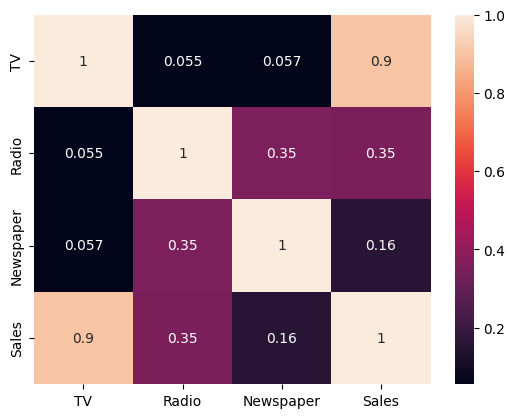

In [7]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

There is some corelation between independent variables but we cannot use vif here to drop any column 
because we have very less data and less columns so we avoid that step.

## Visualization

<Axes: xlabel='TV', ylabel='Sales'>

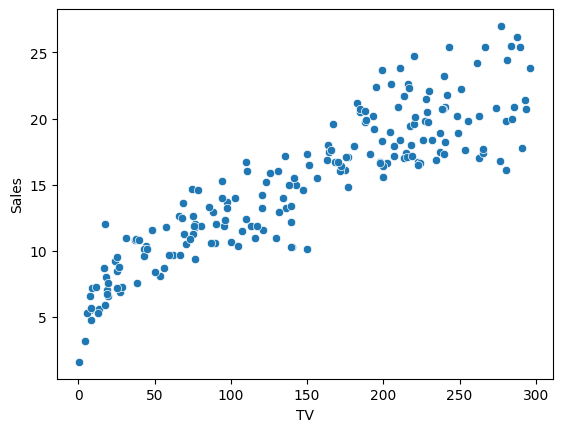

In [14]:
sns.scatterplot(data=df,x='TV',y='Sales')

- Sales of TV is directly affect the total sales

<Axes: xlabel='Radio', ylabel='TV'>

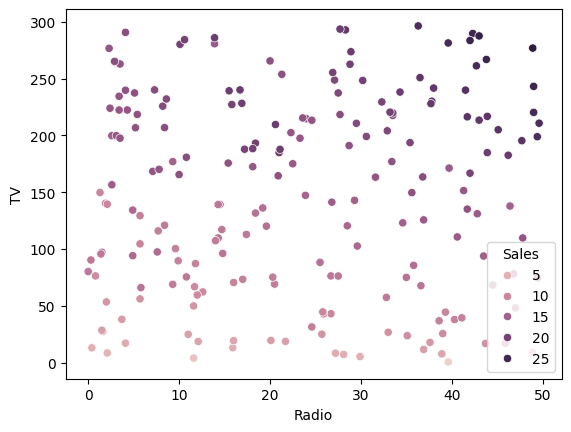

In [20]:
sns.scatterplot(data=df,x='Radio',y='TV',hue='Sales')

- There is no relation between TV and Radio 

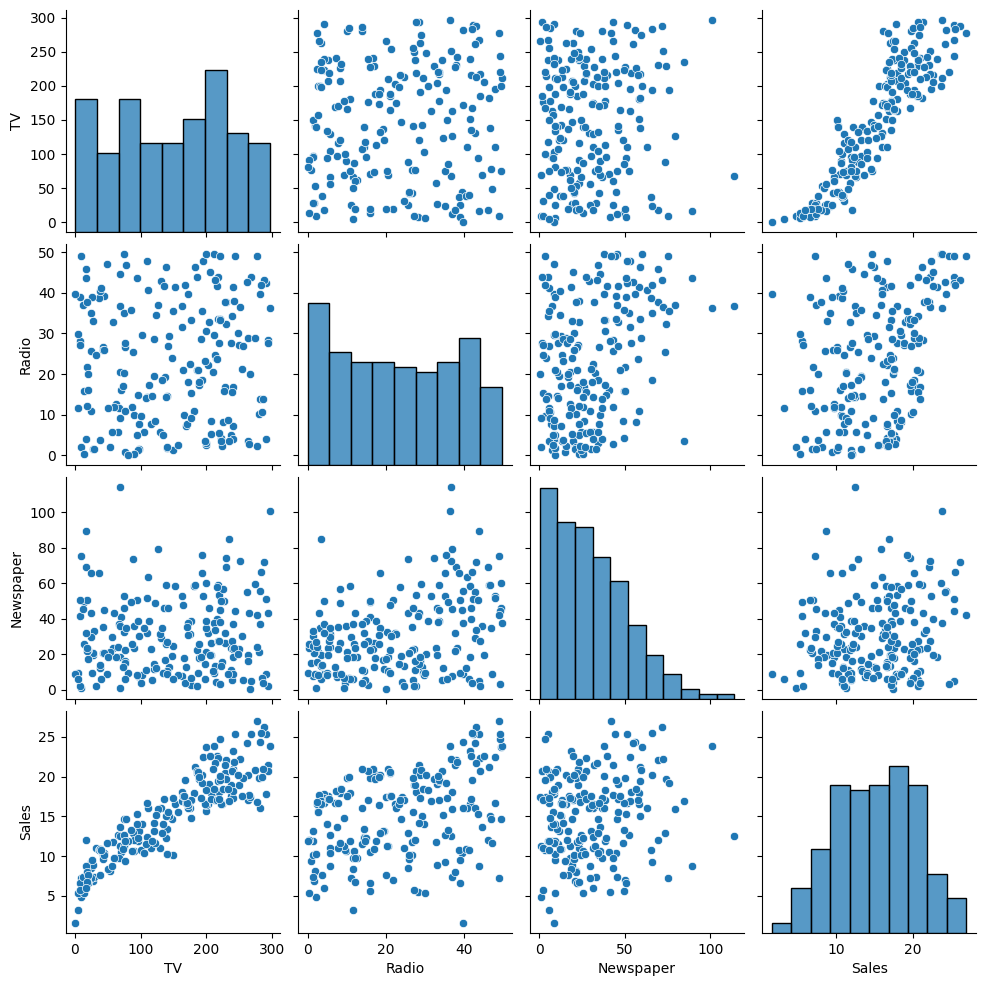

In [15]:
sns.pairplot(data=df)

## Outliers

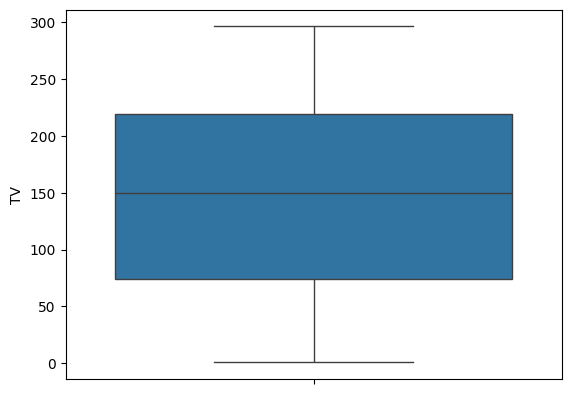

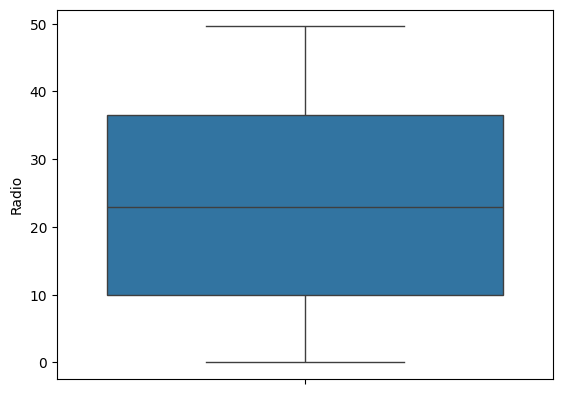

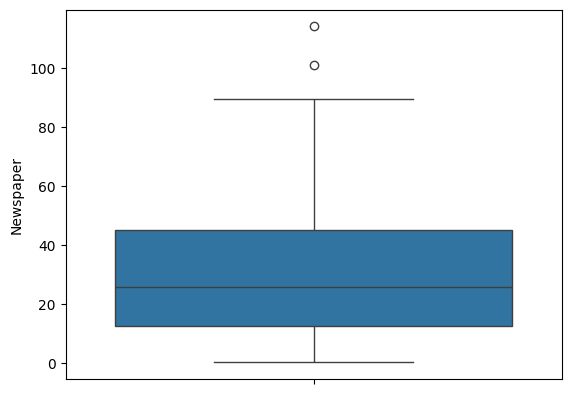

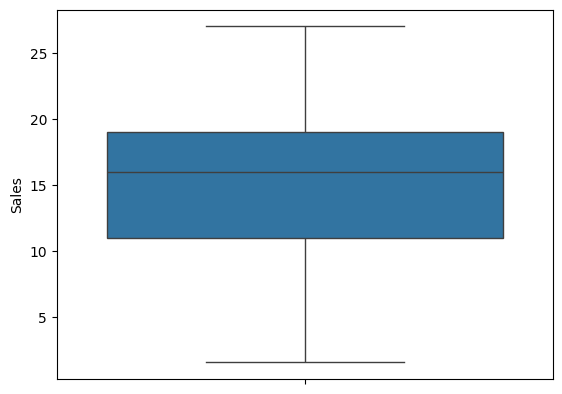

In [21]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

- There is no Outliers in the data

## Model Building

In [23]:
from sklearn.model_selection import train_test_split

x = df.drop('Sales',axis=1)
y = df['Sales']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=100)

## LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

LR = LinearRegression()
LR_model = LR.fit(xtrain, ytrain)
train_pred = LR_model.predict(xtrain)
test_pred = LR_model.predict(xtest)

print('train_error:', mean_absolute_percentage_error(ytrain, train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest, test_pred)*100)


train_error: 12.51968280763914
test_error: 8.109665000669468


## DecisionTreeRegressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT_model = DT.fit(xtrain,ytrain)
train_pred = DT_model.predict(xtrain)
test_pred = DT_model.predict(xtest)

print('train_error:', mean_absolute_percentage_error(ytrain, train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest, test_pred)*100)


train_error: 0.0
test_error: 9.842843454208085


## RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF_model = RF.fit(xtrain,ytrain)
train_pred = RF_model.predict(xtrain)
test_pred = RF_model.predict(xtest)

print('train_error:', mean_absolute_percentage_error(ytrain, train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest, test_pred)*100)


train_error: 3.5929546384138713
test_error: 6.784072570316102


## KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()
knn_model = knn_regressor.fit(xtrain, ytrain)
train_pred = knn_model.predict(xtrain)
test_pred = knn_model.predict(xtest)


print('train_error:', mean_absolute_percentage_error(ytrain, train_pred)*100)
print('test_error:', mean_absolute_percentage_error(ytest, test_pred)*100)

train_error: 9.92165838440702
test_error: 7.172543978031413


#### we go with RandomForestRegressor for predict the sales data